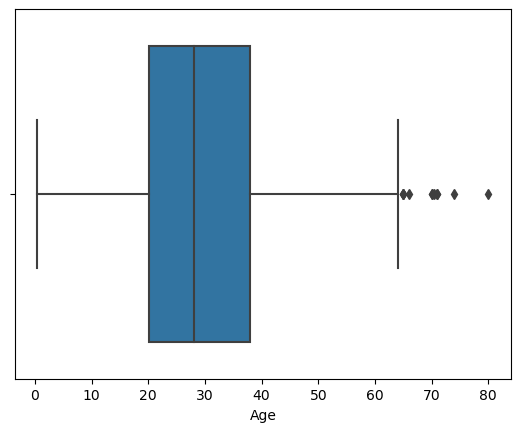

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4
Age True
Fare True
Observations: 307511
Variables: 122
cat_cols: 54
num_cols: 67
cat_but_car: 1
num_but_cat: 39
CNT_CHILDREN True
AMT_INCOME_TOTAL True
AMT_CREDIT True
AMT_ANNUITY True
AMT_GOODS_PRICE True
REGION_POPULATION_RELATIVE True
DAYS_BIRTH False
DAYS_EMPLOYED True
DAYS_REGISTRATION True
DAYS_ID_PUBLISH False
OWN_CAR_AGE True
CNT_FAM_MEMBERS True
HOUR_APPR_PROCESS_START True
EXT_SOURCE_1 False
EXT_SOURCE_2 False
EXT_SOURCE_3 False
APARTMENTS_AVG True
BASEMENTAREA_AVG True
YEARS_BEGINEXPLUATATION_AVG True
YEARS_BUILD_AVG True
COMMONAREA_AVG True
ELEVATORS_AVG True
ENTRANCES_AVG True
FLOORSMAX_AVG True
FLOORSMIN_AVG True
LANDAREA_AVG True
LIVINGAPARTMENTS_AVG True
LIVINGAREA_AVG True
NONLIVINGAPARTMENTS_AVG True
NONLIVINGAREA_AVG True
APARTMENTS_MODE True
BASEMENTAREA_MODE True
YEARS_BEGINEXPLUATATION_MODE True
YEARS_BUILD_MODE True
COMMONAREA_MODE True
ELEVATORS_MODE True
ENTRANCES_MODE True
FL

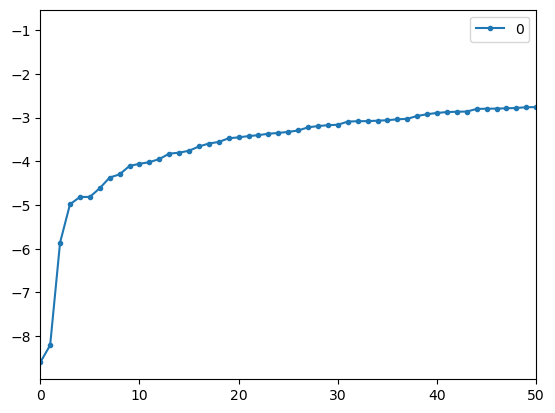

          n_miss  ratio
Cabin        687 77.100
Age          177 19.870
Embarked       2  0.220
          n_miss  ratio
Cabin        687 77.100
Age          177 19.870
Embarked       2  0.220
          n_miss  ratio
Cabin        687 77.100
Age          177 19.870
Embarked       2  0.220
Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4
          n_miss  ratio
Cabin        687 77.100
Age          177 19.870
Embarked       2  0.220


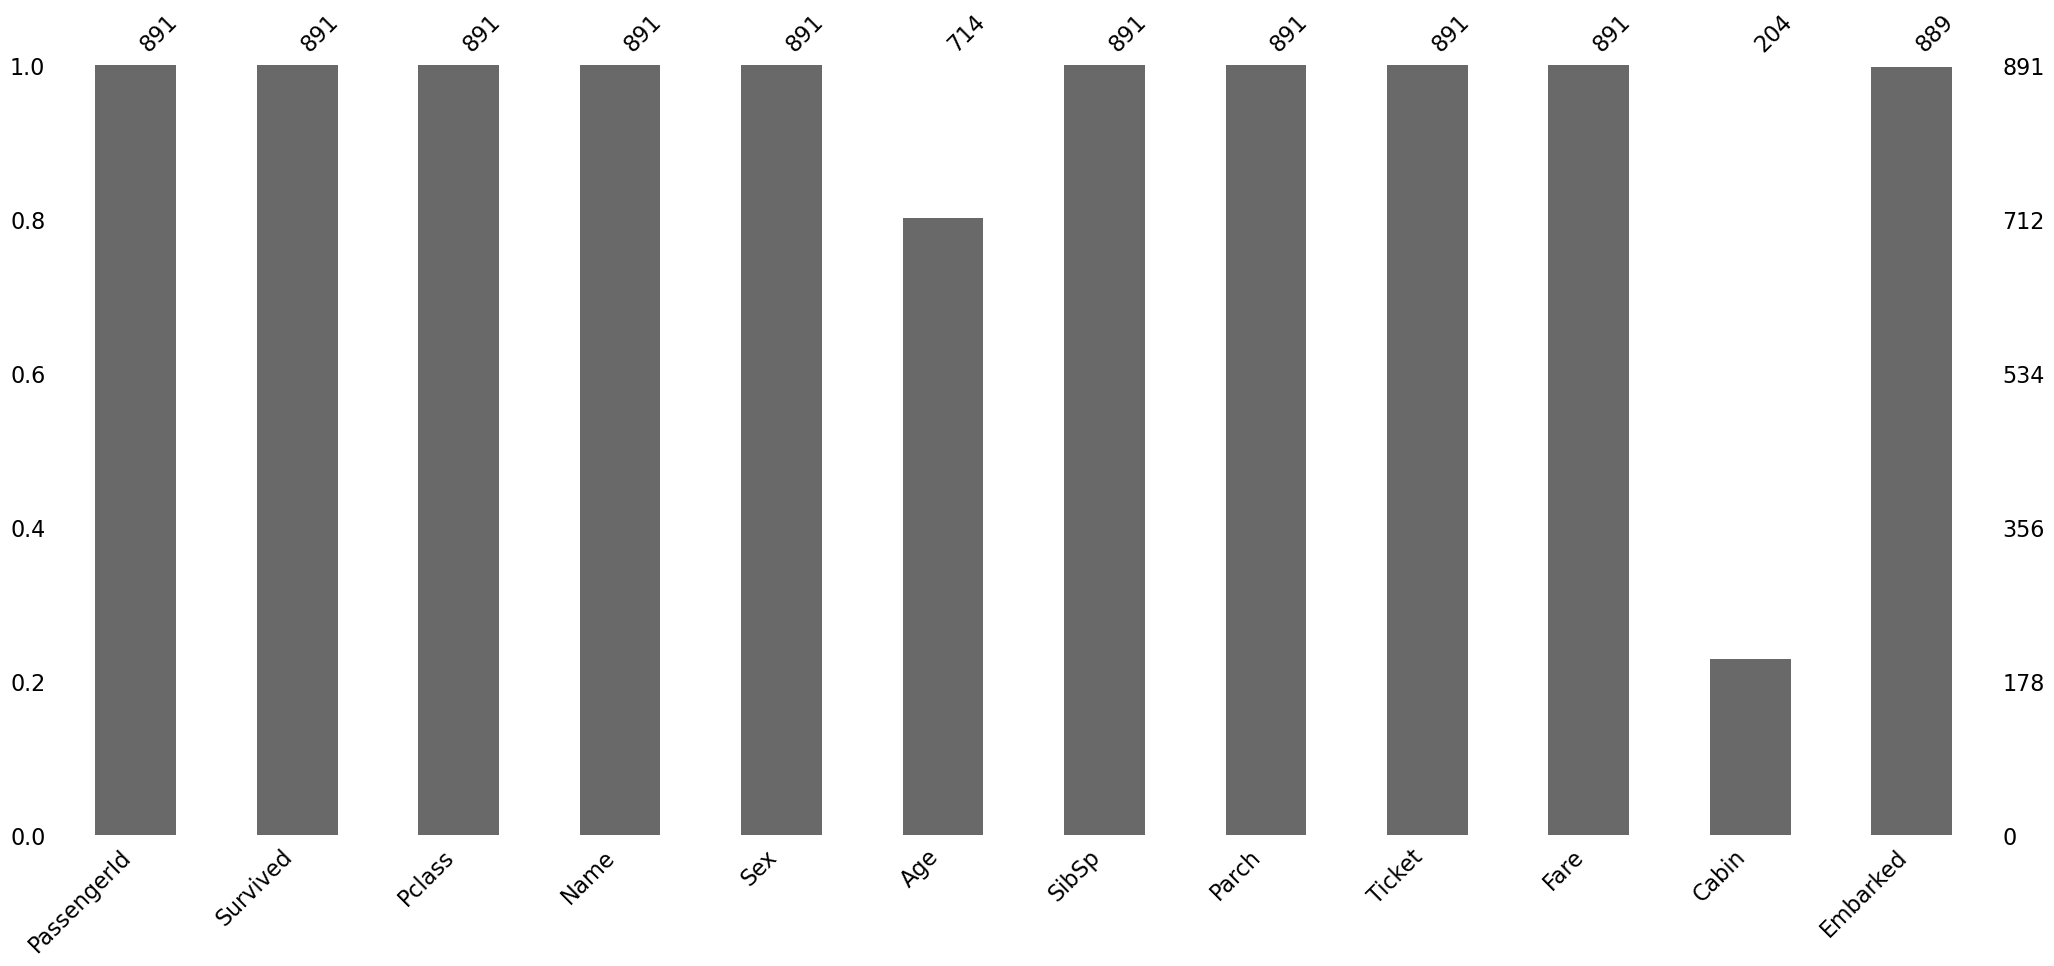

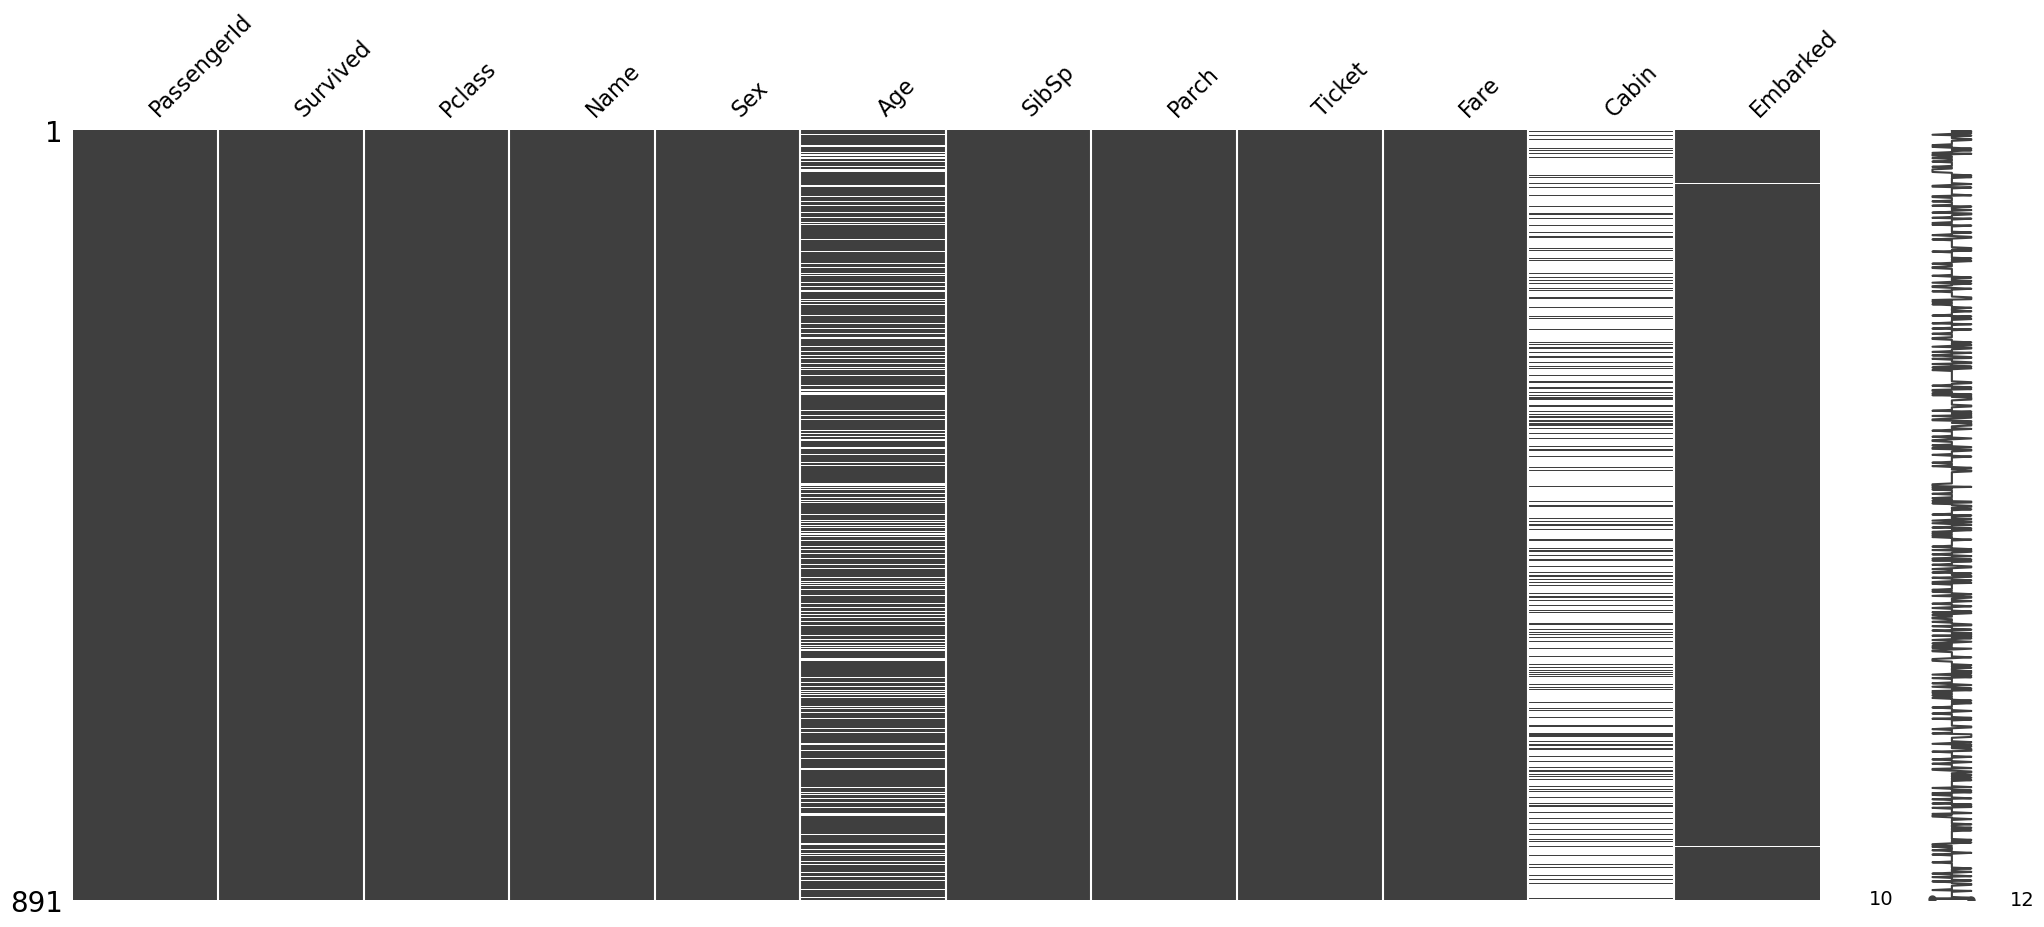

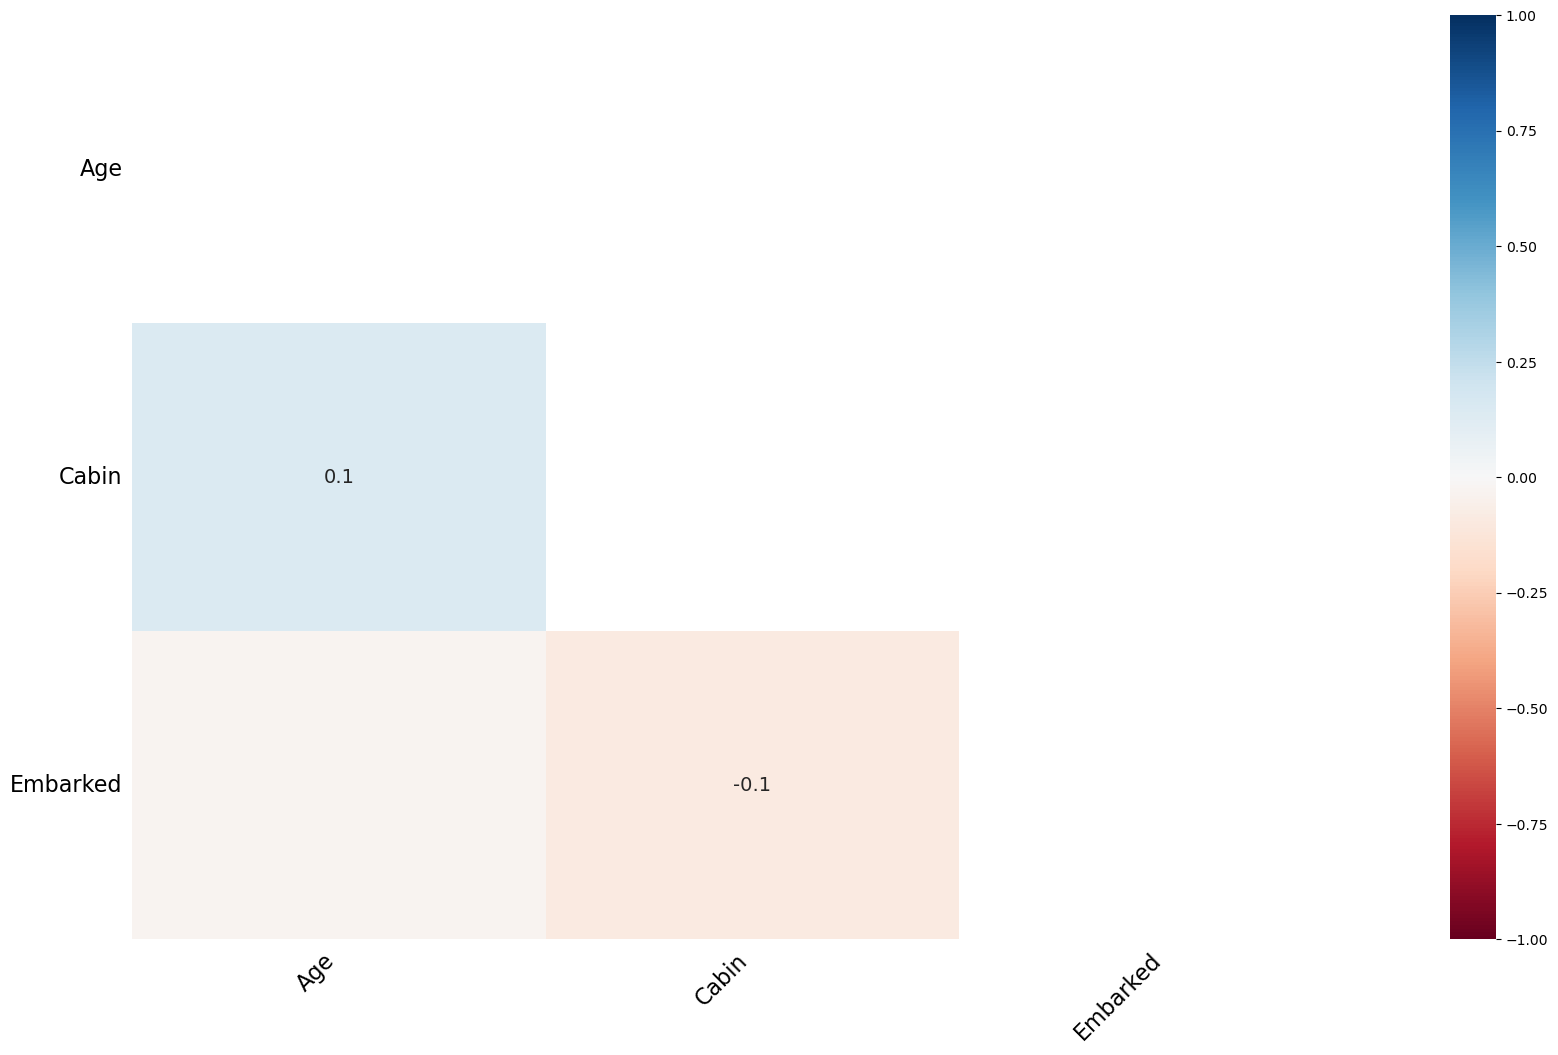

          n_miss  ratio
Cabin        687 77.100
Age          177 19.870
Embarked       2  0.220
          n_miss  ratio
Cabin        687 77.100
Age          177 19.870
Embarked       2  0.220
             TARGET_MEAN  Count
Age_NA_FLAG                    
0                  0.406    714
1                  0.294    177


               TARGET_MEAN  Count
Cabin_NA_FLAG                    
0                    0.667    204
1                    0.300    687


                  TARGET_MEAN  Count
Embarked_NA_FLAG                    
0                       0.382    889
1                       1.000      2


          n_miss  ratio
Cabin        687 77.100
Age          177 19.870
Embarked       2  0.220
             TARGET_MEAN  Count
Age_NA_FLAG                    
0                  0.406    714
1                  0.294    177


               TARGET_MEAN  Count
Cabin_NA_FLAG                    
0                    0.667    204
1                    0.300    687


                  TARGET_M

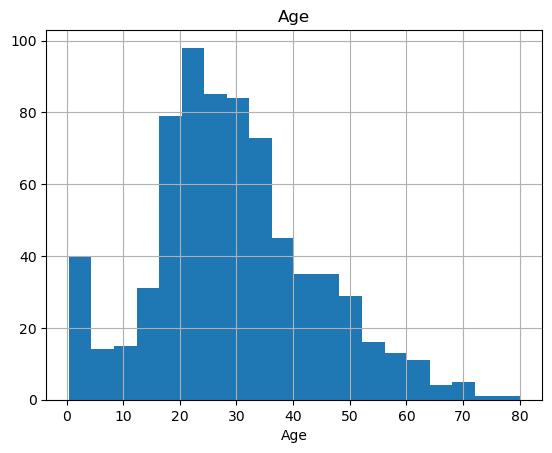

count   714.000
mean      0.000
std       1.001
min      -2.017
5%       -1.770
10%      -1.081
20%      -0.737
30%      -0.530
40%      -0.324
50%      -0.117
60%       0.145
70%       0.434
80%       0.778
90%       1.398
95%       1.812
99%       2.492
max       3.465
Name: Age_standard_scaler, dtype: float64


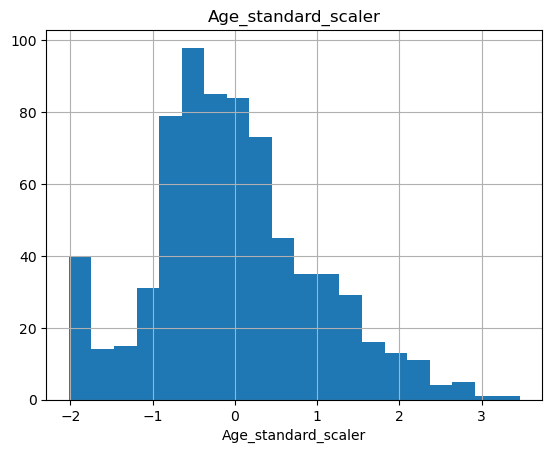

count   714.000
mean      0.095
std       0.813
min      -1.543
5%       -1.343
10%      -0.783
20%      -0.503
30%      -0.336
40%      -0.168
50%       0.000
60%       0.213
70%       0.448
80%       0.727
90%       1.231
95%       1.566
99%       2.119
max       2.909
Name: Age_robuts_scaler, dtype: float64


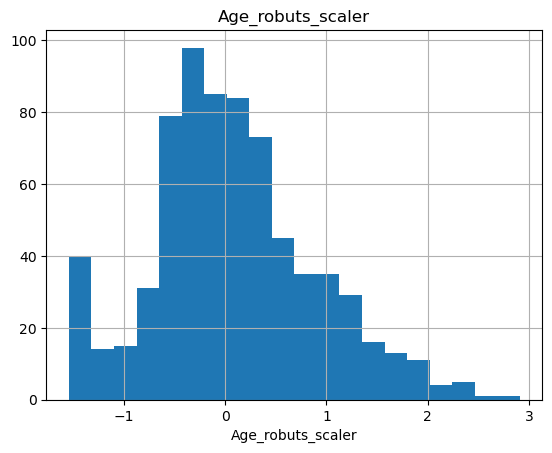

count   714.000
mean      0.368
std       0.183
min       0.000
5%        0.045
10%       0.171
20%       0.233
30%       0.271
40%       0.309
50%       0.347
60%       0.394
70%       0.447
80%       0.510
90%       0.623
95%       0.698
99%       0.822
max       1.000
Name: Age_min_max_scaler, dtype: float64


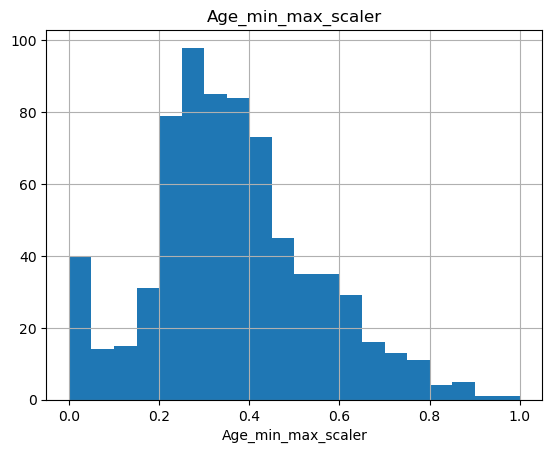

Test Stat = 9.4597, p-value = 0.0000
Test Stat = -6.0704, p-value = 0.0000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4323 entries, 0 to 4322
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rating              4323 non-null   float64
 1   Timestamp           4323 non-null   object 
 2   Enrolled            4323 non-null   object 
 3   Progress            4323 non-null   float64
 4   Questions Asked     4323 non-null   float64
 5   Questions Answered  4323 non-null   float64
dtypes: float64(4), object(2)
memory usage: 202.8+ KB


NEW_SEX_CAT
maturefemale   0.774
maturemale     0.199
seniorfemale   0.909
seniormale     0.135
youngfemale    0.679
youngmale      0.250
Name: Survived, dtype: float64

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# !pip install missingno

import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import (
    MinMaxScaler,
    LabelEncoder,
    StandardScaler,
    RobustScaler,
)

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.float_format", lambda x: "%.3f" % x)
pd.set_option("display.width", 500)
def load_application_train():
    data = pd.read_csv("datasets/application_train.csv")
    return data

df = load_application_train()
df.head()
def load():
    data = pd.read_csv("datasets/titanic.csv")
    return data

df = load()
df.head()
#############################################
# 1. Outliers (Aykırı Değerler)
#############################################
#############################################
# Aykırı Değerleri Yakalama
#############################################
###################
# Grafik Teknikle Aykırı Değerler
###################

sns.boxplot(x=df["Age"])
plt.show()
###################
# Aykırı Değerler Nasıl Yakalanır?
###################

q1 = df["Age"].quantile(0.25)
q3 = df["Age"].quantile(0.75)
iqr = q3 - q1
up = q3 + 1.5 * iqr
low = q1 - 1.5 * iqr
df[(df["Age"] < low) | (df["Age"] > up)]
df[(df["Age"] < low) | (df["Age"] > up)].index
###################
# Aykırı Değer Var mı Yok mu?
###################

df[(df["Age"] < low) | (df["Age"] > up)].any(axis=None)
df[(df["Age"] < low)].any(axis=None)
# 1. Eşik değer belirledik.
# 2. Aykırılara eriştik.
# 3. Hızlıca aykırı değer var mı yok diye sorduk.
###################
# İşlemleri Fonksiyonlaştırmak
###################

def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

outlier_thresholds(df, "Age")
outlier_thresholds(df, "Fare")
low, up = outlier_thresholds(df, "Fare")
df[(df["Fare"] < low) | (df["Fare"] > up)].head()
df[(df["Fare"] < low) | (df["Fare"] > up)].index
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[
        (dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)
    ].any(axis=None):
        return True
    else:
        return False

check_outlier(df, "Age")
check_outlier(df, "Fare")
###################
# grab_col_names
###################

dff = load_application_train()
dff.head()
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.
    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri
    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi
    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))
    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı
    """
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [
        col
        for col in dataframe.columns
        if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"
    ]
    cat_but_car = [
        col
        for col in dataframe.columns
        if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"
    ]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"cat_but_car: {len(cat_but_car)}")
    print(f"num_but_cat: {len(num_but_cat)}")
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)
num_cols = [col for col in num_cols if col not in "PassengerId"]
for col in num_cols:
    print(col, check_outlier(df, col))

cat_cols, num_cols, cat_but_car = grab_col_names(dff)
num_cols = [col for col in num_cols if col not in "SK_ID_CURR"]
for col in num_cols:
    print(col, check_outlier(dff, col))
###################
# Aykırı Değerlerin Kendilerine Erişmek
###################

def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)
    if (
        dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0]
        > 10
    ):
        print(
            dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head()
        )
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])
    if index:
        outlier_index = dataframe[
            ((dataframe[col_name] < low) | (dataframe[col_name] > up))
        ].index
        return outlier_index

grab_outliers(df, "Age")
grab_outliers(df, "Age", True)
age_index = grab_outliers(df, "Age", True)
outlier_thresholds(df, "Age")
check_outlier(df, "Age")
grab_outliers(df, "Age", True)
#############################################
# Aykırı Değer Problemini Çözme
#############################################
###################
# Silme
###################

low, up = outlier_thresholds(df, "Fare")
df.shape
df[~((df["Fare"] < low) | (df["Fare"] > up))].shape
def remove_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    df_without_outliers = dataframe[
        ~((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))
    ]
    return df_without_outliers

cat_cols, num_cols, cat_but_car = grab_col_names(df)
num_cols = [col for col in num_cols if col not in "PassengerId"]
df.shape
for col in num_cols:
    new_df = remove_outlier(df, col)

df.shape[0] - new_df.shape[0]
###################
# Baskılama Yöntemi (re-assignment with thresholds)
###################

low, up = outlier_thresholds(df, "Fare")
df[((df["Fare"] < low) | (df["Fare"] > up))]["Fare"]
df.loc[((df["Fare"] < low) | (df["Fare"] > up)), "Fare"]
df.loc[(df["Fare"] > up), "Fare"] = up
df.loc[(df["Fare"] < low), "Fare"] = low
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

df = load()
cat_cols, num_cols, cat_but_car = grab_col_names(df)
num_cols = [col for col in num_cols if col not in "PassengerId"]
df.shape
for col in num_cols:
    print(col, check_outlier(df, col))

for col in num_cols:
    replace_with_thresholds(df, col)

for col in num_cols:
    print(col, check_outlier(df, col))
###################
# Recap
###################

df = load()
outlier_thresholds(df, "Age")
check_outlier(df, "Age")
grab_outliers(df, "Age", index=True)
remove_outlier(df, "Age").shape
replace_with_thresholds(df, "Age")
check_outlier(df, "Age")
#############################################
# Çok Değişkenli Aykırı Değer Analizi: Local Outlier Factor
#############################################
# 17, 3

df = sns.load_dataset("diamonds")
df = df.select_dtypes(include=["float64", "int64"])
df = df.dropna()
df.head()
df.shape
for col in df.columns:
    print(col, check_outlier(df, col))

low, up = outlier_thresholds(df, "carat")
df[((df["carat"] < low) | (df["carat"] > up))].shape
low, up = outlier_thresholds(df, "depth")
df[((df["depth"] < low) | (df["depth"] > up))].shape
clf = LocalOutlierFactor(n_neighbors=20)
clf.fit_predict(df)
df_scores = clf.negative_outlier_factor_
df_scores[0:5]
# df_scores = -df_scores

np.sort(df_scores)[0:5]
scores = pd.DataFrame(np.sort(df_scores))
scores.plot(stacked=True, xlim=[0, 50], style=".-")
plt.show()
th = np.sort(df_scores)[3]
df[df_scores < th]
df[df_scores < th].shape
df.describe([0.01, 0.05, 0.75, 0.90, 0.99]).T
df[df_scores < th].index
df[df_scores < th].drop(axis=0, labels=df[df_scores < th].index)
#############################################
# Missing Values (Eksik Değerler)
#############################################
#############################################
# Eksik Değerlerin Yakalanması
#############################################

df = load()
df.head()
# eksik gozlem var mı yok mu sorgusu

df.isnull().values.any()
# degiskenlerdeki eksik deger sayisi

df.isnull().sum()
# degiskenlerdeki tam deger sayisi

df.notnull().sum()
# veri setindeki toplam eksik deger sayisi

df.isnull().sum().sum()
# en az bir tane eksik degere sahip olan gözlem birimleri

df[df.isnull().any(axis=1)]
# tam olan gözlem birimleri

df[df.notnull().all(axis=1)]
# Azalan şekilde sıralamak

df.isnull().sum().sort_values(ascending=False)
(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)
na_cols = [col for col in df.columns if df[col].isnull().sum() > 0]
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (
        dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100
    ).sort_values(ascending=False)
    missing_df = pd.concat(
        [n_miss, np.round(ratio, 2)], axis=1, keys=["n_miss", "ratio"]
    )
    print(missing_df, end="\n")
    if na_name:
        return na_columns

missing_values_table(df)
missing_values_table(df, True)
#############################################
# Eksik Değer Problemini Çözme
#############################################

missing_values_table(df)
###################
# Çözüm 1: Hızlıca silmek
###################

df.dropna().shape
###################
# Çözüm 2: Basit Atama Yöntemleri ile Doldurmak
###################

df["Age"].fillna(df["Age"].mean()).isnull().sum()
df["Age"].fillna(df["Age"].median()).isnull().sum()
df["Age"].fillna(0).isnull().sum()
# df.apply(lambda x: x.fillna(x.mean()), axis=0)

df.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0).head()
dff = df.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0)
dff.isnull().sum().sort_values(ascending=False)
df["Embarked"].fillna(df["Embarked"].mode()[0]).isnull().sum()
df["Embarked"].fillna("missing")
df.apply(
    lambda x: x.fillna(x.mode()[0])
    if (x.dtype == "O" and len(x.unique()) <= 10)
    else x,
    axis=0,
).isnull().sum()
###################
# Kategorik Değişken Kırılımında Değer Atama
###################

df.groupby("Sex")["Age"].mean()
df["Age"].mean()
df["Age"].fillna(df.groupby("Sex")["Age"].transform("mean")).isnull().sum()
df.groupby("Sex")["Age"].mean()["female"]
df.loc[(df["Age"].isnull()) & (df["Sex"] == "female"), "Age"] = df.groupby("Sex")[
    "Age"
].mean()["female"]

df.loc[(df["Age"].isnull()) & (df["Sex"] == "male"), "Age"] = df.groupby("Sex")[
    "Age"
].mean()["male"]

df.isnull().sum()
#############################################
# Çözüm 3: Tahmine Dayalı Atama ile Doldurma
#############################################

df = load()
cat_cols, num_cols, cat_but_car = grab_col_names(df)
num_cols = [col for col in num_cols if col not in "PassengerId"]
dff = pd.get_dummies(df[cat_cols + num_cols], drop_first=True)
dff.head()
# değişkenlerin standartlatırılması

scaler = MinMaxScaler()
dff = pd.DataFrame(scaler.fit_transform(dff), columns=dff.columns)
dff.head()
# knn'in uygulanması.

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
dff = pd.DataFrame(imputer.fit_transform(dff), columns=dff.columns)
dff.head()
dff = pd.DataFrame(scaler.inverse_transform(dff), columns=dff.columns)
df["age_imputed_knn"] = dff[["Age"]]
df.loc[df["Age"].isnull(), ["Age", "age_imputed_knn"]]
df.loc[df["Age"].isnull()]
###################
# Recap
###################

df = load()
# missing table

missing_values_table(df)
# sayısal değişkenleri direk median ile oldurma

df.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0).isnull().sum()
# kategorik değişkenleri mode ile doldurma

df.apply(
    lambda x: x.fillna(x.mode()[0])
    if (x.dtype == "O" and len(x.unique()) <= 10)
    else x,
    axis=0,
).isnull().sum()
# kategorik değişken kırılımında sayısal değişkenleri doldurmak

df["Age"].fillna(df.groupby("Sex")["Age"].transform("mean")).isnull().sum()
# Tahmine Dayalı Atama ile Doldurma
#############################################
# Gelişmiş Analizler
#############################################
###################
# Eksik Veri Yapısının İncelenmesi
###################

msno.bar(df)
plt.show()
msno.matrix(df)
plt.show()
msno.heatmap(df)
plt.show()
###################
# Eksik Değerlerin Bağımlı Değişken ile İlişkisinin İncelenmesi
###################

missing_values_table(df, True)
na_cols = missing_values_table(df, True)
def missing_vs_target(dataframe, target, na_columns):
    temp_df = dataframe.copy()
    for col in na_columns:
        temp_df[col + "_NA_FLAG"] = np.where(temp_df[col].isnull(), 1, 0)
    na_flags = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns
    for col in na_flags:
        print(
            pd.DataFrame(
                {
                    "TARGET_MEAN": temp_df.groupby(col)[target].mean(),
                    "Count": temp_df.groupby(col)[target].count(),
                }
            ),
            end="\n\n\n",
        )

missing_vs_target(df, "Survived", na_cols)
###################
# Recap
###################

df = load()
na_cols = missing_values_table(df, True)
# sayısal değişkenleri direk median ile oldurma

df.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0).isnull().sum()
# kategorik değişkenleri mode ile doldurma

df.apply(
    lambda x: x.fillna(x.mode()[0])
    if (x.dtype == "O" and len(x.unique()) <= 10)
    else x,
    axis=0,
).isnull().sum()
# kategorik değişken kırılımında sayısal değişkenleri doldurmak

df["Age"].fillna(df.groupby("Sex")["Age"].transform("mean")).isnull().sum()
# Tahmine Dayalı Atama ile Doldurma

missing_vs_target(df, "Survived", na_cols)
#############################################
# 3. Encoding (Label Encoding, One-Hot Encoding, Rare Encoding)
#############################################
#############################################
# Label Encoding & Binary Encoding
#############################################

df = load()
df.head()
df["Sex"].head()
le = LabelEncoder()
le.fit_transform(df["Sex"])[0:5]
le.inverse_transform([0, 1])
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

df = load()
binary_cols = [
    col
    for col in df.columns
    if df[col].dtype not in [int, float] and df[col].nunique() == 2
]

for col in binary_cols:
    label_encoder(df, col)

df.head()
df = load_application_train()
df.shape
binary_cols = [
    col
    for col in df.columns
    if df[col].dtype not in [int, float] and df[col].nunique() == 2
]

df[binary_cols].head()
for col in binary_cols:
    label_encoder(df, col)

df = load()
df["Embarked"].value_counts()
df["Embarked"].nunique()
len(df["Embarked"].unique())
#############################################
# One-Hot Encoding
#############################################

df = load()
df.head()
df["Embarked"].value_counts()
pd.get_dummies(df, columns=["Embarked"]).head()
pd.get_dummies(df, columns=["Embarked"], drop_first=True).head()
pd.get_dummies(df, columns=["Embarked"], dummy_na=True).head()
pd.get_dummies(df, columns=["Sex", "Embarked"], drop_first=True).head()
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(
        dataframe, columns=categorical_cols, drop_first=drop_first
    )
    return dataframe

df = load()
# cat_cols, num_cols, cat_but_car = grab_col_names(df)

ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]
one_hot_encoder(df, ohe_cols).head()
df.head()
#############################################
# Rare Encoding
#############################################
# 1. Kategorik değişkenlerin azlık çokluk durumunun analiz edilmesi.
# 2. Rare kategoriler ile bağımlı değişken arasındaki ilişkinin analiz edilmesi.
# 3. Rare encoder yazacağız.
###################
# 1. Kategorik değişkenlerin azlık çokluk durumunun analiz edilmesi.
###################

df = load_application_train()
df["NAME_EDUCATION_TYPE"].value_counts()
cat_cols, num_cols, cat_but_car = grab_col_names(df)
def cat_summary(dataframe, col_name, plot=False):
    print(
        pd.DataFrame(
            {
                col_name: dataframe[col_name].value_counts(),
                "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe),
            }
        )
    )
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

for col in cat_cols:
    cat_summary(df, col)
###################
# 2. Rare kategoriler ile bağımlı değişken arasındaki ilişkinin analiz edilmesi.
###################

df["NAME_INCOME_TYPE"].value_counts()
df.groupby("NAME_INCOME_TYPE")["TARGET"].mean()
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(
            pd.DataFrame(
                {
                    "COUNT": dataframe[col].value_counts(),
                    "RATIO": dataframe[col].value_counts() / len(dataframe),
                    "TARGET_MEAN": dataframe.groupby(col)[target].mean(),
                }
            ),
            end="\n\n\n",
        )

rare_analyser(df, "TARGET", cat_cols)
#############################################
# 3. Rare encoder'ın yazılması.
#############################################

def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()
    rare_columns = [
        col
        for col in temp_df.columns
        if temp_df[col].dtypes == "O"
        and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)
    ]
    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), "Rare", temp_df[var])
    return temp_df

new_df = rare_encoder(df, 0.01)
rare_analyser(new_df, "TARGET", cat_cols)
df["OCCUPATION_TYPE"].value_counts()
#############################################
# Feature Scaling (Özellik Ölçeklendirme)
#############################################
###################
# StandardScaler: Klasik standartlaştırma. Ortalamayı çıkar, standart sapmaya böl. z = (x - u) / s
###################

df = load()
ss = StandardScaler()
df["Age_standard_scaler"] = ss.fit_transform(df[["Age"]])
df.head()
###################
# RobustScaler: Medyanı çıkar iqr'a böl.
###################

rs = RobustScaler()
df["Age_robuts_scaler"] = rs.fit_transform(df[["Age"]])
df.describe().T
###################
# MinMaxScaler: Verilen 2 değer arasında değişken dönüşümü
###################
# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X_scaled = X_std * (max - min) + min

mms = MinMaxScaler()
df["Age_min_max_scaler"] = mms.fit_transform(df[["Age"]])
df.describe().T
df.head()
age_cols = [col for col in df.columns if "Age" in col]
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)
    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

for col in age_cols:
    num_summary(df, col, plot=True)
###################
# Numeric to Categorical: Sayısal Değişkenleri Kateorik Değişkenlere Çevirme
# Binning
###################

df["Age_qcut"] = pd.qcut(df["Age"], 5)
#############################################
# Feature Extraction (Özellik Çıkarımı)
#############################################
#############################################
# Binary Features: Flag, Bool, True-False
#############################################

df = load()
df.head()
df["NEW_CABIN_BOOL"] = df["Cabin"].notnull().astype("int")
df.groupby("NEW_CABIN_BOOL").agg({"Survived": "mean"})
from statsmodels.stats.proportion import proportions_ztest
test_stat, pvalue = proportions_ztest(
    count=[
        df.loc[df["NEW_CABIN_BOOL"] == 1, "Survived"].sum(),
        df.loc[df["NEW_CABIN_BOOL"] == 0, "Survived"].sum(),
    ],
    nobs=[
        df.loc[df["NEW_CABIN_BOOL"] == 1, "Survived"].shape[0],
        df.loc[df["NEW_CABIN_BOOL"] == 0, "Survived"].shape[0],
    ],
)

print("Test Stat = %.4f, p-value = %.4f" % (test_stat, pvalue))
df.loc[((df["SibSp"] + df["Parch"]) > 0), "NEW_IS_ALONE"] = "NO"
df.loc[((df["SibSp"] + df["Parch"]) == 0), "NEW_IS_ALONE"] = "YES"
df.groupby("NEW_IS_ALONE").agg({"Survived": "mean"})
test_stat, pvalue = proportions_ztest(
    count=[
        df.loc[df["NEW_IS_ALONE"] == "YES", "Survived"].sum(),
        df.loc[df["NEW_IS_ALONE"] == "NO", "Survived"].sum(),
    ],
    nobs=[
        df.loc[df["NEW_IS_ALONE"] == "YES", "Survived"].shape[0],
        df.loc[df["NEW_IS_ALONE"] == "NO", "Survived"].shape[0],
    ],
)

print("Test Stat = %.4f, p-value = %.4f" % (test_stat, pvalue))
#############################################
# Text'ler Üzerinden Özellik Türetmek
#############################################

df.head()
###################
# Letter Count
###################

df["NEW_NAME_COUNT"] = df["Name"].str.len()
###################
# Word Count
###################

df["NEW_NAME_WORD_COUNT"] = df["Name"].apply(lambda x: len(str(x).split(" ")))
###################
# Özel Yapıları Yakalamak
###################

df["NEW_NAME_DR"] = df["Name"].apply(
    lambda x: len([x for x in x.split() if x.startswith("Dr")])
)

df.groupby("NEW_NAME_DR").agg({"Survived": ["mean", "count"]})
###################
# Regex ile Değişken Türetmek
###################

df.head()
df["NEW_TITLE"] = df.Name.str.extract(" ([A-Za-z]+)\.", expand=False)
df[["NEW_TITLE", "Survived", "Age"]].groupby(["NEW_TITLE"]).agg(
    {"Survived": "mean", "Age": ["count", "mean"]}
)
#############################################
# Date Değişkenleri Üretmek
#############################################

dff = pd.read_csv("datasets/course_reviews.csv")
dff.head()
dff.info()
dff["Timestamp"] = pd.to_datetime(dff["Timestamp"], format="%Y-%m-%d")
# year

dff["year"] = dff["Timestamp"].dt.year
# month

dff["month"] = dff["Timestamp"].dt.month
# year diff

dff["year_diff"] = date.today().year - dff["Timestamp"].dt.year
# month diff (iki tarih arasındaki ay farkı): yıl farkı + ay farkı

dff["month_diff"] = (
    (date.today().year - dff["Timestamp"].dt.year) * 12
    + date.today().month
    - dff["Timestamp"].dt.month
)
# day name

dff["day_name"] = dff["Timestamp"].dt.day_name()
dff.head()
# date
#############################################
# Feature Interactions (Özellik Etkileşimleri)
#############################################

df = load()
df.head()
df["NEW_AGE_PCLASS"] = df["Age"] * df["Pclass"]
df["NEW_FAMILY_SIZE"] = df["SibSp"] + df["Parch"] + 1
df.loc[(df["Sex"] == "male") & (df["Age"] <= 21), "NEW_SEX_CAT"] = "youngmale"
df.loc[
    (df["Sex"] == "male") & (df["Age"] > 21) & (df["Age"] < 50), "NEW_SEX_CAT"
] = "maturemale"

df.loc[(df["Sex"] == "male") & (df["Age"] >= 50), "NEW_SEX_CAT"] = "seniormale"
df.loc[(df["Sex"] == "female") & (df["Age"] <= 21), "NEW_SEX_CAT"] = "youngfemale"
df.loc[
    (df["Sex"] == "female") & (df["Age"] > 21) & (df["Age"] < 50), "NEW_SEX_CAT"
] = "maturefemale"

df.loc[(df["Sex"] == "female") & (df["Age"] >= 50), "NEW_SEX_CAT"] = "seniorfemale"
df.head()
df.groupby("NEW_SEX_CAT")["Survived"].mean()

In [3]:
df = load()
df.shape
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [4]:
df.columns = [col.upper() for col in df.columns]

In [5]:
df["NEW_CABIN_BOOL"] = df["CABIN"].notnull().astype("int")
# Name count

df["NEW_NAME_COUNT"] = df["NAME"].str.len()
# name word count

df["NEW_NAME_WORD_COUNT"] = df["NAME"].apply(lambda x: len(str(x).split(" ")))
# name dr

df["NEW_NAME_DR"] = df["NAME"].apply(
    lambda x: len([x for x in x.split() if x.startswith("Dr")])
)
# name title

df["NEW_TITLE"] = df.NAME.str.extract(" ([A-Za-z]+)\.", expand=False)
# family size

df["NEW_FAMILY_SIZE"] = df["SIBSP"] + df["PARCH"] + 1
# age_pclass

df["NEW_AGE_PCLASS"] = df["AGE"] * df["PCLASS"]
# is alone

df.loc[((df["SIBSP"] + df["PARCH"]) > 0), "NEW_IS_ALONE"] = "NO"
df.loc[((df["SIBSP"] + df["PARCH"]) == 0), "NEW_IS_ALONE"] = "YES"
# age level

df.loc[(df["AGE"] < 18), "NEW_AGE_CAT"] = "young"
df.loc[(df["AGE"] >= 18) & (df["AGE"] < 56), "NEW_AGE_CAT"] = "mature"
df.loc[(df["AGE"] >= 56), "NEW_AGE_CAT"] = "senior"
# sex x age

df.loc[(df["SEX"] == "male") & (df["AGE"] <= 21), "NEW_SEX_CAT"] = "youngmale"
df.loc[
    (df["SEX"] == "male") & (df["AGE"] > 21) & (df["AGE"] < 50), "NEW_SEX_CAT"
] = "maturemale"

df.loc[(df["SEX"] == "male") & (df["AGE"] >= 50), "NEW_SEX_CAT"] = "seniormale"
df.loc[(df["SEX"] == "female") & (df["AGE"] <= 21), "NEW_SEX_CAT"] = "youngfemale"
df.loc[
    (df["SEX"] == "female") & (df["AGE"] > 21) & (df["AGE"] < 50), "NEW_SEX_CAT"
] = "maturefemale"

df.loc[(df["SEX"] == "female") & (df["AGE"] >= 50), "NEW_SEX_CAT"] = "seniorfemale"

In [6]:
df.head()

,PASSENGERID,SURVIVED,PCLASS,NAME,SEX,AGE,SIBSP,PARCH,TICKET,FARE,CABIN,EMBARKED,NEW_CABIN_BOOL,NEW_NAME_COUNT,NEW_NAME_WORD_COUNT,NEW_NAME_DR,NEW_TITLE,NEW_FAMILY_SIZE,NEW_AGE_PCLASS,NEW_IS_ALONE,NEW_AGE_CAT,NEW_SEX_CAT
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,0,23,4,0,Mr,2,66.000,NO,mature,maturemale
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,1,51,7,0,Mrs,2,38.000,NO,mature,maturefemale
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,0,22,3,0,Miss,1,78.000,YES,mature,maturefemale
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,1,44,7,0,Mrs,2,35.000,NO,mature,maturefemale
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,0,24,4,0,Mr,1,105.000,YES,mature,maturemale


In [7]:
df.shape

(891, 22)

In [8]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 891
Variables: 22
cat_cols: 14
num_cols: 5
cat_but_car: 3
num_but_cat: 8


In [9]:
num_cols = [col for col in num_cols if "PASSENGERID" not in col]

In [10]:
for col in num_cols:
    print(col, check_outlier(df, col))

AGE True
FARE True
NEW_NAME_COUNT True
NEW_AGE_PCLASS True


In [11]:
for col in num_cols:
    replace_with_thresholds(df, col)

In [12]:
for col in num_cols:
    print(col, check_outlier(df, col))

AGE False
FARE False
NEW_NAME_COUNT False
NEW_AGE_PCLASS False


In [13]:
missing_values_table(df)

                n_miss  ratio
CABIN              687 77.100
AGE                177 19.870
NEW_AGE_PCLASS     177 19.870
NEW_AGE_CAT        177 19.870
NEW_SEX_CAT        177 19.870
EMBARKED             2  0.220


In [14]:
df.drop("CABIN", inplace=True, axis=1)

In [15]:
remove_cols = ["TICKET", "NAME"]

In [16]:
df.drop(remove_cols, inplace=True, axis=1)

In [17]:
df["AGE"] = df["AGE"].fillna(df.groupby("NEW_TITLE")["AGE"].transform("median"))

In [18]:
df["NEW_AGE_PCLASS"] = df["AGE"] * df["PCLASS"]

In [19]:
df.loc[(df["AGE"] < 18), "NEW_AGE_CAT"] = "young"
df.loc[(df["AGE"] >= 18) & (df["AGE"] < 56), "NEW_AGE_CAT"] = "mature"
df.loc[(df["AGE"] >= 56), "NEW_AGE_CAT"] = "senior"
df.loc[(df["SEX"] == "male") & (df["AGE"] <= 21), "NEW_SEX_CAT"] = "youngmale"
df.loc[
    (df["SEX"] == "male") & (df["AGE"] > 21) & (df["AGE"] < 50), "NEW_SEX_CAT"
] = "maturemale"

df.loc[(df["SEX"] == "male") & (df["AGE"] >= 50), "NEW_SEX_CAT"] = "seniormale"
df.loc[(df["SEX"] == "female") & (df["AGE"] <= 21), "NEW_SEX_CAT"] = "youngfemale"
df.loc[
    (df["SEX"] == "female") & (df["AGE"] > 21) & (df["AGE"] < 50), "NEW_SEX_CAT"
] = "maturefemale"

df.loc[(df["SEX"] == "female") & (df["AGE"] >= 50), "NEW_SEX_CAT"] = "seniorfemale"

In [20]:
df = df.apply(
    lambda x: x.fillna(x.mode()[0])
    if (x.dtype == "O" and len(x.unique()) <= 10)
    else x,
    axis=0,
)

In [21]:
binary_cols = [
    col
    for col in df.columns
    if df[col].dtype not in [int, float] and df[col].nunique() == 2
]

In [22]:
for col in binary_cols:
    df = label_encoder(df, col)

In [23]:
rare_analyser(df, "SURVIVED", cat_cols)

SEX : 2
   COUNT  RATIO  TARGET_MEAN
0    314  0.352        0.742
1    577  0.648        0.189


EMBARKED : 3
   COUNT  RATIO  TARGET_MEAN
C    168  0.189        0.554
Q     77  0.086        0.390
S    646  0.725        0.339


NEW_TITLE : 17
          COUNT  RATIO  TARGET_MEAN
Capt          1  0.001        0.000
Col           2  0.002        0.500
Countess      1  0.001        1.000
Don           1  0.001        0.000
Dr            7  0.008        0.429
Jonkheer      1  0.001        0.000
Lady          1  0.001        1.000
Major         2  0.002        0.500
Master       40  0.045        0.575
Miss        182  0.204        0.698
Mlle          2  0.002        1.000
Mme           1  0.001        1.000
Mr          517  0.580        0.157
Mrs         125  0.140        0.792
Ms            1  0.001        1.000
Rev           6  0.007        0.000
Sir           1  0.001        1.000


NEW_IS_ALONE : 2
   COUNT  RATIO  TARGET_MEAN
0    354  0.397        0.506
1    537  0.603        0.304


N

In [24]:
df = rare_encoder(df, 0.01)
df["NEW_TITLE"].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Rare       27
Name: NEW_TITLE, dtype: int64

In [25]:
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]

In [26]:
df = one_hot_encoder(df, ohe_cols)

In [27]:
df.head()
df.shape

(891, 52)

In [28]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 891
Variables: 52
cat_cols: 47
num_cols: 5
cat_but_car: 0
num_but_cat: 47


In [29]:
num_cols = [col for col in num_cols if "PASSENGERID" not in col]

In [30]:
rare_analyser(df, "SURVIVED", cat_cols)

SURVIVED : 2
   COUNT  RATIO  TARGET_MEAN
0    549  0.616        0.000
1    342  0.384        1.000


SEX : 2
   COUNT  RATIO  TARGET_MEAN
0    314  0.352        0.742
1    577  0.648        0.189


NEW_CABIN_BOOL : 2
   COUNT  RATIO  TARGET_MEAN
0    687  0.771        0.300
1    204  0.229        0.667


NEW_NAME_DR : 2
   COUNT  RATIO  TARGET_MEAN
0    881  0.989        0.383
1     10  0.011        0.500


NEW_IS_ALONE : 2
   COUNT  RATIO  TARGET_MEAN
0    354  0.397        0.506
1    537  0.603        0.304


PCLASS_2 : 2
   COUNT  RATIO  TARGET_MEAN
0    707  0.793        0.361
1    184  0.207        0.473


PCLASS_3 : 2
   COUNT  RATIO  TARGET_MEAN
0    400  0.449        0.557
1    491  0.551        0.242


SIBSP_1 : 2
   COUNT  RATIO  TARGET_MEAN
0    682  0.765        0.337
1    209  0.235        0.536


SIBSP_2 : 2
   COUNT  RATIO  TARGET_MEAN
0    863  0.969        0.381
1     28  0.031        0.464


SIBSP_3 : 2
   COUNT  RATIO  TARGET_MEAN
0    875  0.982        0.386
1     

In [31]:
useless_cols = [
    col
    for col in df.columns
    if df[col].nunique() == 2
    and (df[col].value_counts() / len(df) < 0.01).any(axis=None)
]

In [32]:
scaler = StandardScaler()

In [33]:
df[num_cols] = scaler.fit_transform(df[num_cols])

In [34]:
df[num_cols].head()

,AGE,FARE,NEW_NAME_COUNT,NEW_AGE_PCLASS
0,-0.561,-0.821,-0.437,0.066
1,0.663,2.032,2.248,-0.790
2,-0.255,-0.788,-0.559,0.434
3,0.434,1.419,2.126,-0.882
4,0.434,-0.781,-0.315,1.260


In [35]:
df.head()

,PASSENGERID,SURVIVED,SEX,AGE,FARE,NEW_CABIN_BOOL,NEW_NAME_COUNT,NEW_NAME_DR,NEW_AGE_PCLASS,NEW_IS_ALONE,PCLASS_2,PCLASS_3,SIBSP_1,SIBSP_2,SIBSP_3,SIBSP_4,SIBSP_5,SIBSP_8,PARCH_1,PARCH_2,PARCH_3,PARCH_4,PARCH_5,PARCH_6,EMBARKED_Q,EMBARKED_S,NEW_NAME_WORD_COUNT_4,NEW_NAME_WORD_COUNT_5,NEW_NAME_WORD_COUNT_6,NEW_NAME_WORD_COUNT_7,NEW_NAME_WORD_COUNT_8,NEW_NAME_WORD_COUNT_9,NEW_NAME_WORD_COUNT_14,NEW_TITLE_Miss,NEW_TITLE_Mr,NEW_TITLE_Mrs,NEW_TITLE_Rare,NEW_FAMILY_SIZE_2,NEW_FAMILY_SIZE_3,NEW_FAMILY_SIZE_4,NEW_FAMILY_SIZE_5,NEW_FAMILY_SIZE_6,NEW_FAMILY_SIZE_7,NEW_FAMILY_SIZE_8,NEW_FAMILY_SIZE_11,NEW_AGE_CAT_senior,NEW_AGE_CAT_young,NEW_SEX_CAT_maturemale,NEW_SEX_CAT_seniorfemale,NEW_SEX_CAT_seniormale,NEW_SEX_CAT_youngfemale,NEW_SEX_CAT_youngmale
0,1,0,1,-0.561,-0.821,0,-0.437,0,0.066,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2,1,0,0.663,2.032,1,2.248,0,-0.790,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,0,-0.255,-0.788,0,-0.559,0,0.434,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0.434,1.419,1,2.126,0,-0.882,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,1,0.434,-0.781,0,-0.315,0,1.260,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [36]:
df.shape

(891, 52)

In [37]:
y = df["SURVIVED"]
X = df.drop(["PASSENGERID", "SURVIVED"], axis=1)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=17
)

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy_score(y_pred, y_test)

0.8059701492537313

In [41]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame(
        {"Value": model.feature_importances_, "Feature": features.columns}
    )
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(
        x="Value",
        y="Feature",
        data=feature_imp.sort_values(by="Value", ascending=False)[0:num],
    )
    plt.title("Features")
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig("importances.png")

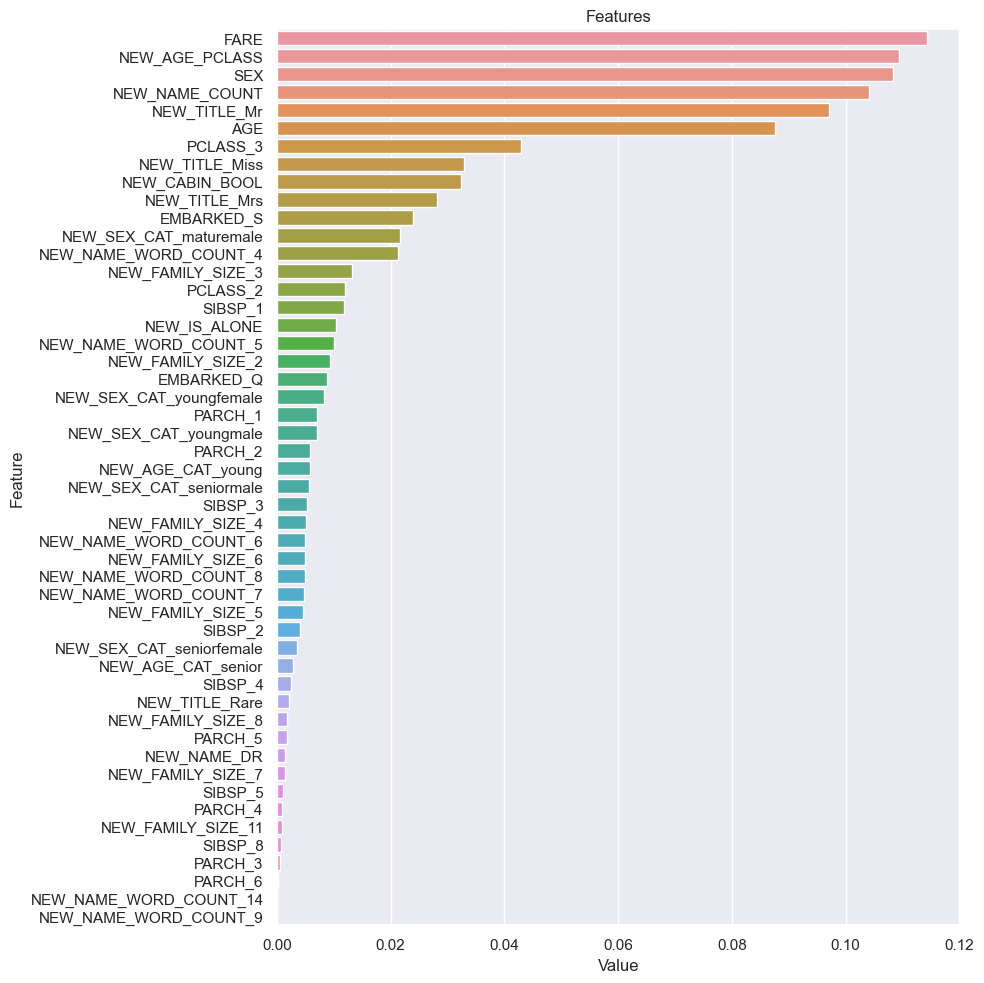

In [42]:
plot_importance(rf_model, X_train)